In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 

url = "https://data.nasa.gov/resource/y77d-th95.json"

response = requests.get(url)
data = response.json()

structured_data = []
for item in data:
    data_info = {
        'Name of Earth Meteorite': item.get('name'),
        'ID of Earth Meteorite': item.get('id'),
        'nametype': item.get('nametype'),
        'recclass': item.get('recclass'),
        'Mass of Earth Meteorite': float(item.get('mass').split()[0]) if item.get('mass') else 0,
        'Year at which Earth Meteorite was hit':pd.to_datetime(item.get('year'), errors='coerce'),
        'reclat': (item.get('reclat')),
        'reclong':(item.get('reclong')),
        'Coordinates': item.get('geolocation', {}).get('coordinates', [])
    }
    structured_data.append(data_info)

df = pd.DataFrame(structured_data)
df.to_csv('earth.csv', index=False)

In [8]:
df.head()

,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,reclong,Coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.775000,6.083330,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.183330,10.233330,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.216670,-113.000000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.883330,-99.900000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.166670,-64.950000,"[-64.95, -33.16667]"


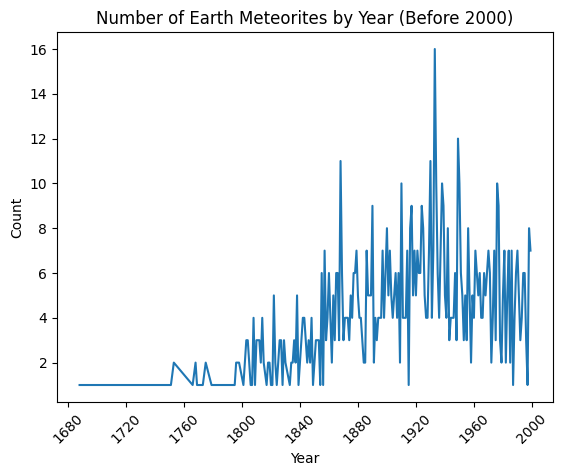

In [68]:
# Get all the Earth meteorites that fell before the year 2000
import matplotlib.pyplot as plt

Meteorite_hit_before_2000= df[df['Year at which Earth Meteorite was hit'] < "2000-01-01"]

# Count the occurrences of each year
year_counts = Meteorite_hit_before_2000['Year at which Earth Meteorite was hit'].value_counts().sort_index()

# Create the line plot
plt.plot(year_counts.index, year_counts.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Earth Meteorites by Year (Before 2000)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [78]:
# Get all the earth meteorites co-ordinates who fell before the year 1970
Meteorite_hit_before_1970 = df[df['Name of Earth Meteorite']<"1970-01-01"]
Coordinates_ofMeteorite_hit_before_1970=Meteorite_hit_before_2000[['Year at which Earth Meteorite was hit','Coordinates']]
Coordinates_ofMeteorite_hit_before_1970

,Year at which Earth Meteorite was hit,Coordinates
0,1880-01-01,"[6.08333, 50.775]"
1,1951-01-01,"[10.23333, 56.18333]"
2,1952-01-01,"[-113, 54.21667]"
3,1976-01-01,"[-99.9, 16.88333]"
4,1902-01-01,"[-64.95, -33.16667]"
...,...,...
994,1807-01-01,"[35.2, 54.5]"
995,1934-01-01,"[79.41667, 13.63333]"
997,1869-01-01,"[111.53333, -7.08333]"
998,1922-01-01,"[106.58333, -6.66667]"


In [13]:
# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
Meteorite_with_mass_more_than_10000=df[df["Mass of Earth Meteorite"]>10000]
print(Meteorite_with_mass_more_than_10000[['Name of Earth Meteorite','Mass of Earth Meteorite']])


    Name of Earth Meteorite  Mass of Earth Meteorite
2                      Abee                 107000.0
7                      Agen                  30000.0
11                      Aïr                  24000.0
16                  Akyumak                  50000.0
27               Alfianello                 228000.0
..                      ...                      ...
991               Tieschitz                  28000.0
992                  Tilden                  74800.0
994                Timochin                  65500.0
997                   Tjabe                  20000.0
998                Tjerebon                  16500.0

[243 rows x 2 columns]
